# Running SCORE on a Single Image

## Import Libraries

In [25]:
%matplotlib inline
import sys
import pickle

# Define paths and directories
lib_path = '/gpfswork/rech/xdy/uze68md/GitHub/'
data_path = '/gpfswork/rech/xdy/uze68md/data/'

# Add library path to PYTHONPATH
path_alphatransform = lib_path+'alpha-transform'
path_score = lib_path+'score'
sys.path.insert(0, path_alphatransform)
sys.path.insert(0, path_score)

# Load libraries
from score import score
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [26]:
f = open(data_path+"cfht_parametric_batch.pkl", "rb")
batch = pickle.load(f)
f.close()

In [27]:
for key in batch:
    print(key, batch[key].shape)

flux_radius (3072,)
inputs (3072, 64, 64)
mag_auto (3072,)
ps_cfht (3072, 64, 33)
ps_hst (3072, 64, 33)
psf_cfht (3072, 128, 65)
psf_hst (3072, 128, 65)
targets (3072, 64, 64)
attributes (3072, 2)
inputs_noiseless (3072, 64, 64, 1)
inputs_cfht (3072, 128, 128)
inputs_tikho (3072, 64, 64)
windows (3072, 64, 64)
windows_flag (3072,)
targets_mom (2, 3072)
target_ell (2, 3072)


In [28]:
gals_obs = batch['inputs'][batch['windows_flag']][:2]
psfs = np.array([np.fft.ifftshift(np.fft.irfft2(p, s=[64,64])) for p in batch['psf_cfht'][batch['windows_flag']][:2]])
psf_hst = np.fft.ifftshift(np.fft.irfft2(batch['psf_hst'][0], s=[64,64]))

## Initialize SCORE

In [29]:
#initiate instances of score
#set the value of gamma
g1 = score(gamma=1)

## Run SCORE

In [30]:
#loop
sol_g1 = []

for obs, psf in zip(gals_obs,psfs):
    #deconvolve
    g1.deconvolve(obs=obs,psf=psf)
    sol_g1 += [g1.solution]

Running restoration...
RESTORATION PROCESS DONE
Running diagnostic...
starlets generation    2.00000
beta                   0.23508
k                      4.00000
gamma                  1.00000
RIP                    0.00000
tolerance              0.00000
halt criterion         0.00000
# of iterations        150.00000
total # of iterations  150.00000
RESTORATION PROCESS INITIATED
Initializing variables...
Running restoration...
RESTORATION PROCESS DONE
Running diagnostic...
starlets generation    2.00000
beta                   0.23324
k                      4.00000
gamma                  1.00000
RIP                    0.00000
tolerance              0.00000
halt criterion         0.00000
# of iterations        150.00000
total # of iterations  150.00000


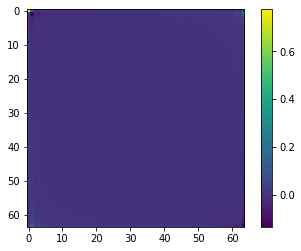

In [31]:
plt.imshow(np.fft.ifftshift(psf_hst));plt.colorbar()

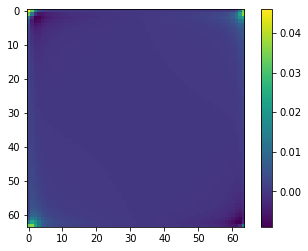

In [32]:
plt.imshow(np.fft.ifftshift(psfs[1]));plt.colorbar()